***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***

The majority of these snippets are from https://tensorflow.rstudio.com/keras/

## Download Keras

In [0]:
devtools::install_github("rstudio/keras")

Skipping install of 'keras' from a github remote, the SHA1 (59fc3256) has not changed since last install.
  Use `force = TRUE` to force installation


## Import the Keras library

In [0]:
library(keras)

## Load dataset

In [0]:
mnist <- dataset_mnist()

## Load features

In [0]:
x_train <- mnist$train$x
x_test <- mnist$test$x


## Load targets

In [0]:
y_train <- mnist$train$y
y_test <- mnist$test$y

## Reshape the values to convert the image into a vector

Each image is originally 28x28x1 (the last x1 is due to the fact that the image is greyscale). So each 28x28 image can be converted into a vector of length 784 (28*28 = 784)

In [0]:
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

## Rescale values

In [0]:
x_train <- x_train / 255
x_test <- x_test / 255

## Convert targets/labels to their one-hot encoded equivalent

In [0]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

## Create a model

In [0]:
model <- keras_model_sequential() 

We can add a number of layers and activation functions to the model.

We start off by adding `model %>% ` then append each new layer (with it's activation function) on a new line.

The first layer has one extra thing which the others do not have. For the first layer we specify the input shape, which denotes the shape of the data input. In this case the shape of the input is just a vector of length 784, and thus we add `input_shape = c(784)`.

First we start off with a simple model with two layers then we will add more complexity to the model. 

In each case the line `model <- keras_model_sequential() ` is added otherwise we will keep on adding layers to the first instance of the variable `model` and create a massive model.





In [0]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dense(units = 10, activation = 'softmax')

Next, we add an extra layer so the model can learn more complexities.

In [0]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')

Next, we add dropout to the first hidden layer

In [0]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')

Finally, we add dropout to the next hidden layer.

In [0]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

## Print out a summary of the network architecture

In [0]:
summary(model)

Model: "sequential_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_25 (Dense)                    (None, 256)                     200960      
________________________________________________________________________________
dropout_8 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_26 (Dense)                    (None, 128)                     32896       
________________________________________________________________________________
dropout_9 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_27 (Dense)                    (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_______________

## Compile the model

We need to provide extra information to train the model. We need to specify the loss function, the optimiser and what metric to display to the user.

In [0]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

## Training the neural network

In [0]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 10, batch_size = 128, 
  validation_split = 0.2
)

## Plot the training performance.

When calling the fit function, Keras provides feedback of what happens to the loss during training. This is useful in determining if the model was over-fitting for example.

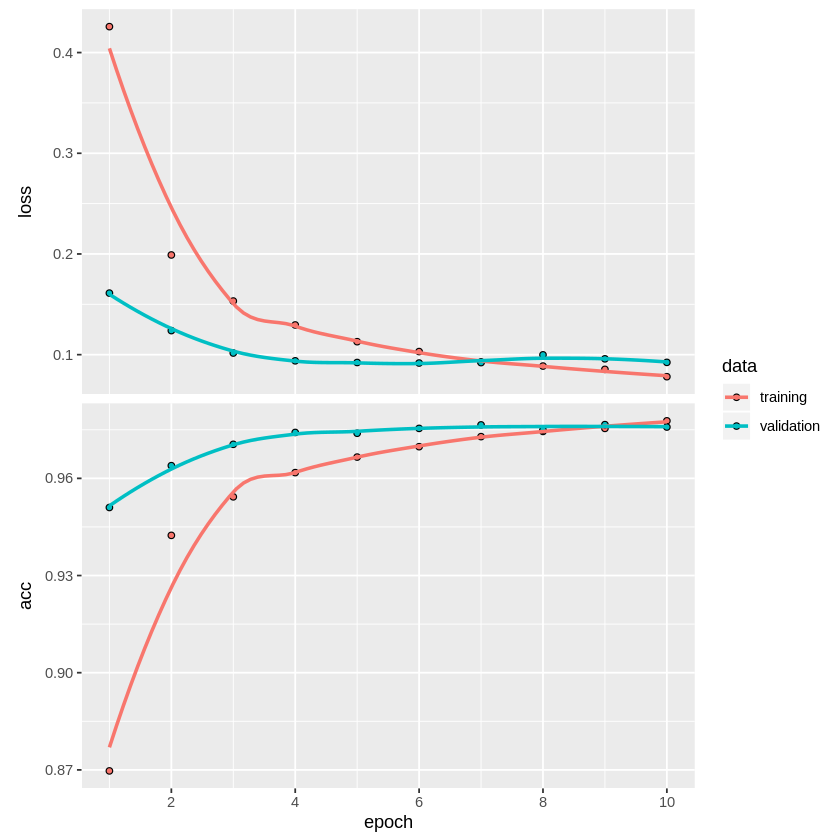

In [0]:
plot(history)

## Evaluate the performance on the test data

In [0]:
model %>% evaluate(x_test, y_test)

$loss
[1] 0.08786205

$acc
[1] 0.9778

## Prediction

To predict we can either predict on an entire matrix or on a subset.

In the case of a subset, you need to make sure that the correct dimensions are used as the network has certain input expectations. In this case, the model expects data in this format : [batches, 784]. So you can send any number of batches of data to the network.

In [0]:
dim(x_test)

[1] 10000   784

Here we want to predict on the first 10 test examples. But just using `x_test[0:10]` would result in the incorrect dimension. So we need to reshape the data.

In [0]:
subset <- array_reshape(array(x_test[0:10,]), c(10, 784))

Here we check the dimensions

In [0]:
dim(subset)

[1]  10 784

Finally, we can predict on the 10 first examples

In [0]:
model %>% predict_classes(subset)

[1] 8 7 2 6 5 3 7 7 6 5

Here we predict on all of the `x_test `data.

In [0]:
model %>% predict_classes(x_test)

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2
   [37] 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0
   [73] 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1
  [109] 9 4 8 7 3 9 7 9 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1
  [145] 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8
  [181] 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0
  [217] 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 5 8 7 9 2 2 4 1 5 9 8 7 2 3 0 6 4 2 4 1
  [253] 9 5 7 7 2 8 2 0 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4
  [289] 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 7 9 3
  [325] 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9
  [361] 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5
  [397] 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8
  [433] 4 5 9 8 8 3 7 6 0 0 3 0 2 0 6 9 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2
  [469] 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5 2 3 7 0 9 4 0 6 3 9 5 2
  [505] 1 3 1 3 6 5 7 4 2 2 6 3 2 6 5 4 8 9 7 1 3 0 3 8 3 1 9 3 4 4 6 4 2 1 8 2
  [541] 5 4 8 8 4 0 0 2 3 2 7 7 0 8 7 4 4 7 9 6 9 0 9 8 0 4 6 0 6 3 5 4 8 3 3 9
  [577] 3 3 3 7 8 0 2 8 1 7 0 6 5 4 3 8 0 9 6 3 8 0 9 9 6 8 6 8 5 7 8 6 0 2 4 0
  [613] 2 2 3 1 9 7 5 8 0 8 4 6 2 6 7 9 3 2 9 8 2 2 9 2 7 3 5 9 1 8 0 2 0 5 2 1
  [649] 3 7 6 7 1 2 5 8 0 3 7 8 4 0 9 1 8 6 7 7 4 3 4 9 1 9 5 1 7 3 9 7 6 9 1 3
  [685] 3 8 3 3 6 7 2 4 5 8 5 1 1 4 4 3 1 0 7 7 0 7 9 9 4 8 5 5 4 0 8 2 1 0 8 4
  [721] 8 0 4 0 6 1 9 3 2 6 7 2 6 9 3 1 4 6 2 5 9 2 0 6 2 1 7 3 4 1 0 5 4 3 1 1
  [757] 7 4 9 9 4 8 4 0 2 4 5 1 1 6 4 7 1 9 4 2 4 1 5 5 3 8 3 1 4 5 6 8 9 4 1 5
  [793] 3 8 0 3 2 5 1 2 8 3 4 4 0 8 8 3 3 1 7 3 5 9 6 3 2 6 1 3 6 0 7 2 1 7 1 4
  [829] 2 4 2 1 7 9 6 1 1 2 4 8 1 7 7 4 8 0 7 3 1 3 1 0 7 7 0 3 5 5 2 7 6 6 9 2
  [865] 8 3 5 2 2 5 6 0 8 2 9 2 8 8 8 8 7 4 9 3 0 6 6 3 2 1 3 2 2 9 3 0 0 5 7 8
  [901] 3 4 4 6 0 2 9 1 4 7 4 7 3 9 8 8 4 7 1 2 1 2 2 3 2 3 2 3 9 1 7 4 0 3 5 5
  [937] 8 6 5 2 6 7 6 6 3 2 7 8 1 1 7 4 6 4 9 5 1 3 3 4 7 8 9 1 1 0 9 1 4 4 5 4
  [973] 0 6 2 2 3 1 5 1 2 0 3 8 1 2 6 7 1 6 2 3 9 0 1 2 2 0 8 9 9 0 2 5 1 9 7 8
 [1009] 1 0 4 1 7 9 5 4 2 6 8 1 3 7 5 4 4 1 8 1 3 8 1 2 5 8 0 6 2 1 1 2 1 5 3 4
 [1045] 6 9 5 0 9 2 2 4 8 2 1 7 2 4 9 4 4 0 3 9 2 2 3 3 8 3 5 7 3 5 8 1 2 4 4 6
 [1081] 4 9 5 1 0 6 9 5 9 5 9 7 3 8 0 3 7 1 3 6 7 8 5 9 7 9 6 9 6 3 7 4 6 5 3 5
 [1117] 4 7 8 7 8 0 7 6 8 8 7 3 3 1 9 5 2 7 3 5 1 1 2 1 4 7 4 7 5 4 5 4 0 8 3 6
 [1153] 9 6 0 2 7 4 4 4 4 6 6 4 7 9 5 4 5 5 8 7 3 7 2 7 0 2 4 1 1 6 5 9 2 8 7 2
 [1189] 0 1 5 0 9 1 7 0 6 0 8 6 8 1 8 0 3 3 7 2 3 6 2 1 6 1 1 3 7 9 0 8 0 5 4 0
 [1225] 2 8 2 2 9 8 4 0 9 5 8 5 1 2 1 3 1 7 9 5 7 2 0 3 8 8 6 2 5 4 1 9 2 1 5 8
 [1261] 1 0 2 4 4 3 6 8 8 2 4 0 5 0 4 4 7 9 3 4 1 5 9 7 3 5 8 8 0 3 3 3 6 6 0 1
 [1297] 6 0 3 5 4 4 1 2 9 1 4 6 9 9 3 9 8 4 4 3 1 3 1 3 8 7 9 4 8 8 7 9 9 1 4 5
 [1333] 6 0 5 2 2 2 1 5 5 2 4 9 6 2 7 7 2 2 1 1 2 8 3 7 2 4 1 7 1 7 6 7 8 2 7 3
 [1369] 1 7 5 8 2 6 2 2 5 6 6 0 9 2 4 3 3 9 7 6 6 8 0 4 1 3 8 2 9 1 8 0 6 7 2 1
 [1405] 0 5 5 2 0 2 2 0 2 4 9 8 0 9 9 4 6 5 4 9 1 8 3 4 9 9 1 2 2 8 1 9 6 4 0 9
 [1441] 4 8 3 8 6 0 2 5 1 9 6 2 9 4 0 9 6 0 6 2 5 4 2 3 8 4 5 5 0 3 8 5 3 5 8 6
 [1477] 5 7 6 3 3 9 6 1 1 2 9 0 4 3 3 6 9 5 7 3 7 7 7 8 1 9 8 3 0 7 2 7 9 4 5 4
 [1513] 9 3 2 1 4 0 2 3 7 5 9 8 8 5 0 5 1 4 7 3 9 0 0 0 6 6 2 3 7 8 4 7 7 9 2 4
 [1549] 1 6 5 2 4 9 9 1 8 4 0 9 8 4 8 7 7 0 7 8 8 6 0 4 8 8 2 4 7 6 6 6 4 7 1 8
 [1585] 8 2 3 6 3 0 0 3 7 6 9 7 9 9 5 4 3 3 6 1 2 3 7 3 3 6 0 3 3 8 4 3 6 3 5 0
 [1621] 2 0 9 0 7 4 6 9 3 5 1 9 6 1 4 5 4 5 0 5 9 5 2 1 2 9 1 9 9 4 0 8 4 5 2 9
 [1657] 2 1 2 1 7 3 6 8 8 4 9 1 9 8 5 7 5 1 1 8 6 5 0 4 4 7 2 3 5 6 8 8 6 2 3 1
 [1693] 0 5 8 9 2 9 6 7 0 4 8 7 1 7 4 1 0 3 7 2 0 0 9 1 7 0 7 8 4 7 2 0 4 6 0 3
 [1729] 1 1 3 3 9 6 7 4 1 5 3 0 8 7 3 9 6 9 3 5 0 2 7 4 5 1 2 5 8 0 8 8 1 5 0 3
 [1765] 0 3 1 4 0 3 7 2 7 1 8 0 7 0 4 3 1 9 8 7 7 1 4 9 9 3 8 1 7 9 0 2 0 3 3 7
 [18